In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bigmart_csv')
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
df.shape

(8523, 12)

In [4]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

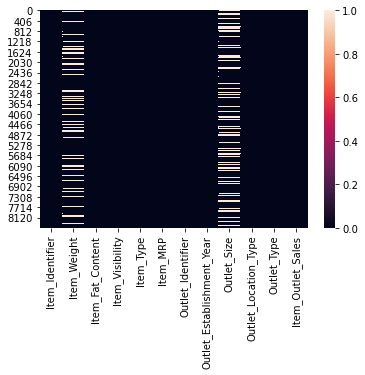

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.fillna(method='ffill', inplace=True)

In [123]:
df.isnull().any()

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Item_Outlet_Sales            False
dtype: bool

In [11]:
dfcor=df.corr()
dfcor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.010645,0.020279,-0.004928,0.013116
Item_Visibility,-0.010645,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.020279,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.004928,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.013116,-0.128625,0.567574,-0.049135,1.000000


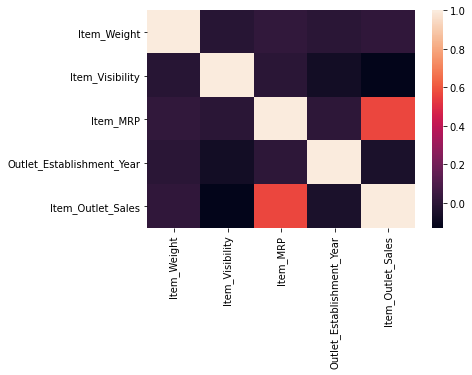

In [12]:
sns.heatmap(dfcor)

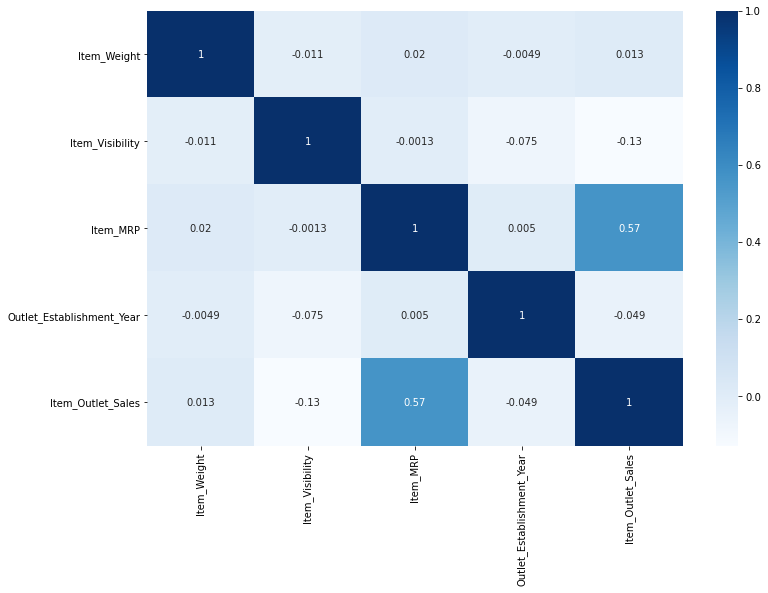

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='Blues',annot=True)

# EDA process

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.849649,0.066132,140.992782,1997.831867,2181.288914
std,4.631020,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.750000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [42]:
#encoding the Item_Identifier Content column
df.iloc[:,0] = labelencoder.fit_transform(df.iloc[:,0].values)
                                        
#encoding the Item_Fat_Content Content column
df.iloc[:,2] = labelencoder.fit_transform(df.iloc[:,2].values)

#encoding the Item_Type Content column
df.iloc[:,4] = labelencoder.fit_transform(df.iloc[:,4].values)

#encoding the Outlet_Identifier column
df.iloc[:,6] = labelencoder.fit_transform(df.iloc[:,6].values)

#encoding the Outlet_Size Content column
df.iloc[:,8] = labelencoder.fit_transform(df.iloc[:,8].values)


#encoding the Outlet_Location_Type Content column
df.iloc[:,9] = labelencoder.fit_transform(df.iloc[:,9].values)

#encoding the Outlet_Type Content column
df.iloc[:,10] = labelencoder.fit_transform(df.iloc[:,10].values)






In [43]:
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Item_Outlet_Sales'].unique())

[1 0 2]
[0 2 1]
[3735.138   443.4228 2097.27   ... 7182.6504 3608.636  2778.3834]


In [44]:
df.dtypes

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

# visualization 

In [45]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

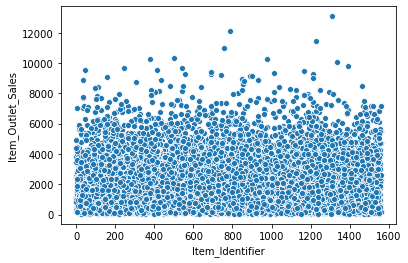

In [46]:
import seaborn as sns
sns.scatterplot(x='Item_Identifier',y='Item_Outlet_Sales',data=df)

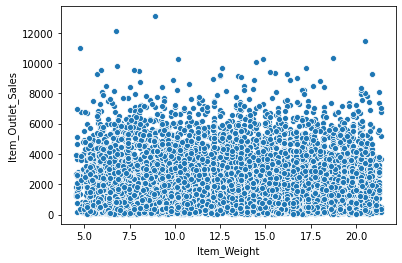

In [47]:
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',data=df)

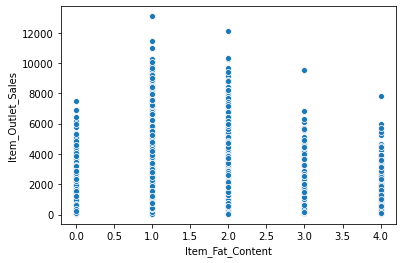

In [48]:
sns.scatterplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

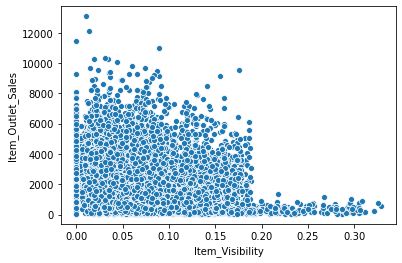

In [49]:
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',data=df)

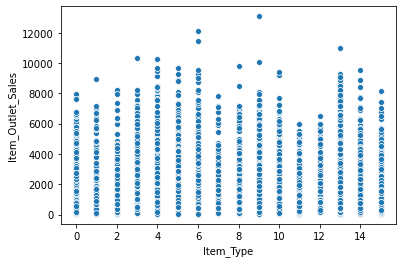

In [50]:
sns.scatterplot(x='Item_Type',y='Item_Outlet_Sales',data=df)




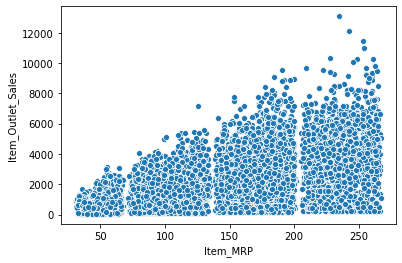

In [51]:
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=df)


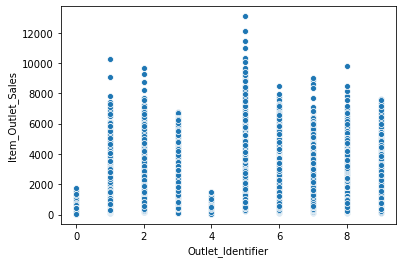

In [52]:
sns.scatterplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df)


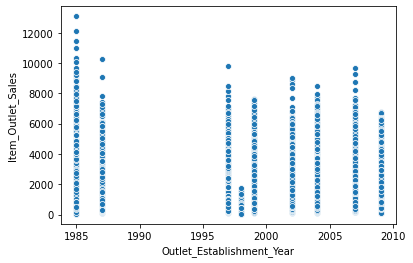

In [53]:
sns.scatterplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df)


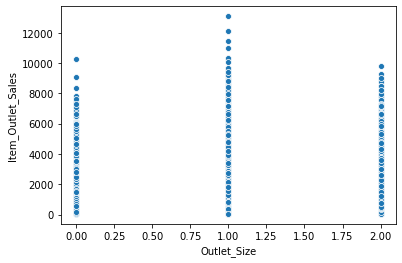

In [54]:
sns.scatterplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df)


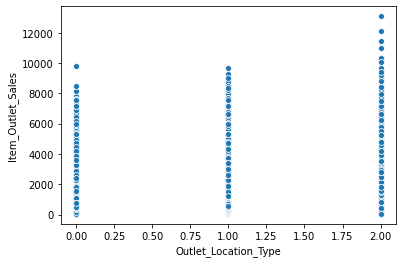

In [55]:
sns.scatterplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df)


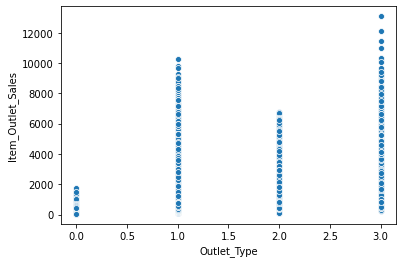

In [56]:
sns.scatterplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df)


# skewness

In [57]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [58]:
df.skew().any

<bound method Series.any of Item_Identifier             -0.008877
Item_Weight                  0.084110
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.360354
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64>

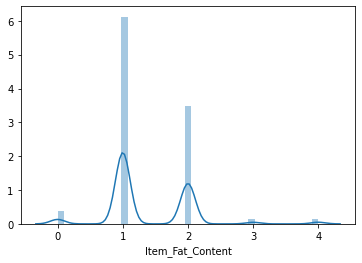

In [59]:
sns.distplot(df['Item_Fat_Content'])
plt.show()

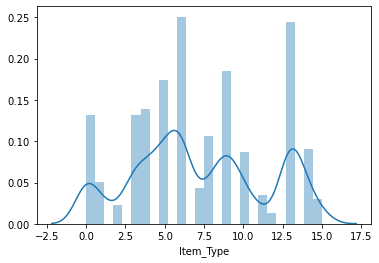

In [60]:
sns.distplot(df['Item_Type'])
plt.show()

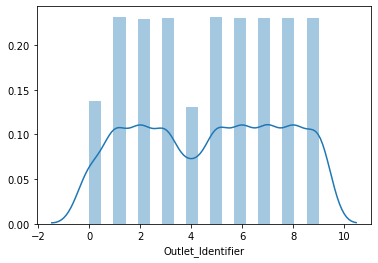

In [61]:
sns.distplot(df['Outlet_Identifier'])
plt.show()

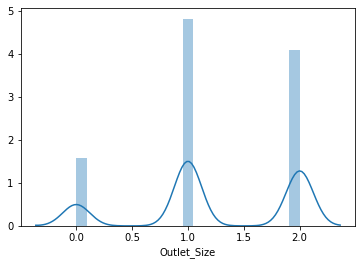

In [62]:
sns.distplot(df['Outlet_Size'])
plt.show()

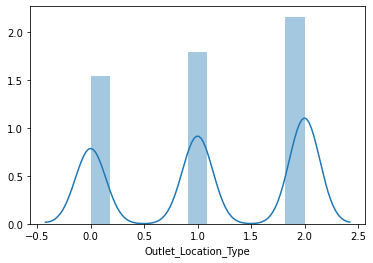

In [63]:
sns.distplot(df['Outlet_Location_Type'])
plt.show()

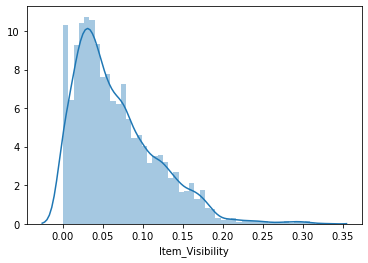

In [64]:
sns.distplot(df['Item_Visibility'])
plt.show()

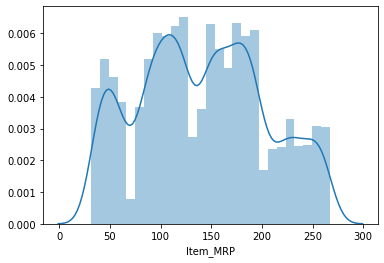

In [65]:
sns.distplot(df['Item_MRP'])
plt.show()

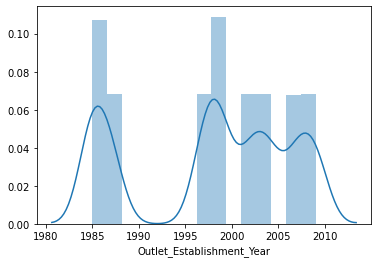

In [66]:
sns.distplot(df['Outlet_Establishment_Year'])
plt.show()

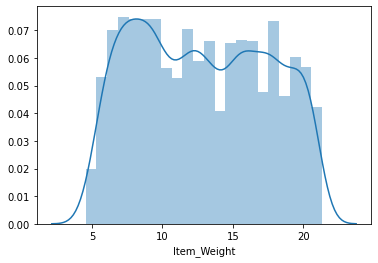

In [67]:
sns.distplot(df['Item_Weight'])
plt.show()

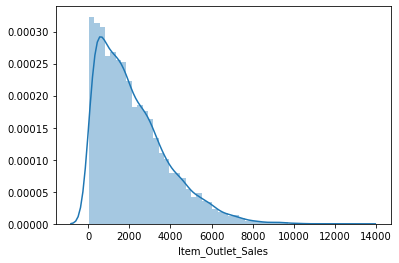

In [68]:
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

# checking for outliers

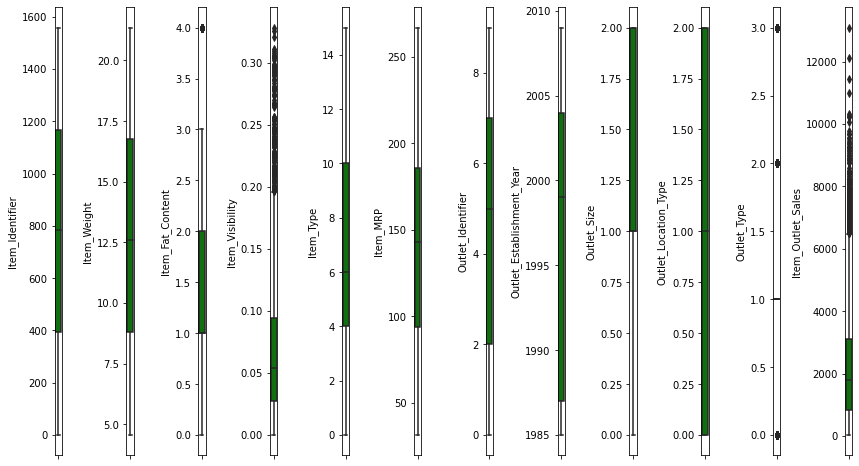

In [69]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]], color='green',orient='v')
    plt.tight_layout()

# data cleaning 

In [70]:
df=df.drop(['Item_Visibility','Outlet_Type'],axis=1)

In [71]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
0,156,9.300,1,4,249.8092,9,1999,1,0,3735.1380
1,8,5.920,2,14,48.2692,3,2009,1,2,443.4228
2,662,17.500,1,10,141.6180,9,1999,1,0,2097.2700
3,1121,19.200,2,6,182.0950,0,1998,1,2,732.3800
4,1297,8.930,1,9,53.8614,1,1987,0,2,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,13,214.5218,1,1987,0,2,2778.3834
8519,897,8.380,2,0,108.1570,7,2002,0,1,549.2850
8520,1357,10.600,1,8,85.1224,6,2004,2,1,1193.1136
8521,681,7.210,2,13,103.1332,3,2009,1,2,1845.5976


# z-score technique

In [77]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(8523, 10)

In [78]:
threshold=3
print(np.where(z>3))

(array([  81,  130,  145,  151,  199,  276,  304,  333,  339,  373,  396,
        456,  472,  489,  615,  661,  694,  727,  753,  753,  809,  838,
        891,  935,  991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138,
       1183, 1209, 1254, 1372, 1433, 1450, 1506, 1512, 1542, 1549, 1576,
       1615, 1617, 1684, 1723, 1753, 1769, 1859, 1998, 2062, 2109, 2111,
       2143, 2168, 2173, 2216, 2223, 2238, 2293, 2331, 2438, 2516, 2535,
       2552, 2569, 2660, 2678, 2776, 2905, 2971, 2973, 3011, 3083, 3087,
       3098, 3154, 3225, 3234, 3241, 3242, 3243, 3286, 3335, 3367, 3407,
       3480, 3491, 3509, 3545, 3582, 3602, 3667, 3709, 3720, 3757, 4019,
       4083, 4163, 4245, 4289, 4290, 4346, 4349, 4393, 4415, 4463, 4676,
       4680, 4681, 4772, 4865, 4888, 4961, 4991, 5047, 5054, 5065, 5133,
       5146, 5177, 5185, 5202, 5223, 5315, 5401, 5417, 5467, 5500, 5539,
       5550, 5577, 5611, 5619, 5633, 5752, 5784, 5799, 5812, 5977, 6000,
       6132, 6134, 6176, 6268, 6334, 6344, 6357, 6

In [79]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(8523, 10)
(8317, 10)


# percentage loss

In [81]:
loss_percent=(8523-8317)/8523*100
print(loss_percent)

2.4169893230083304


dividing data in features and vectors

In [82]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

# transforming data to remove skewness:
    

In [120]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [113]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled=sc.fit_transform(x)

In [114]:
x

array([[-1.45781774, -0.72830029, -0.55363648, ...,  0.04156308,
        -0.4071033 , -1.36984609],
       [-2.08913929, -1.60324775,  1.15831947, ...,  1.45957326,
        -0.4071033 ,  1.09379863],
       [-0.15562949,  0.99970184, -0.55363648, ...,  0.04156308,
        -0.4071033 , -1.36984609],
       ...,
       [ 1.19845042, -0.42427915, -0.55363648, ...,  0.71010203,
         1.12279437, -0.12048128],
       [-0.11434194, -1.25227506,  1.15831947, ...,  1.45957326,
        -0.4071033 ,  1.09379863],
       [-1.85814239,  0.47381932, -0.55363648, ..., -0.20514187,
         1.12279437, -1.36984609]])

# model building

In [115]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


best_rstate=0
accu=0
for i in range(0,400):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"best accuracy {accu*100}found on random_state {best_rstate}")
    

best accuracy 47.63213156134988found on random_state 133


In [107]:
#spliting the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=133)

# finding the best model

In [116]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=44.03833853477478, Cross_val_score = 43.92685872029342 $ difference = 0.11147981448136335


In [117]:
#randomo forestregressor
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RandomForestRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=52.569205523024685, Cross_val_score = 55.35779454315325 $ difference = -2.788589020128562


In [118]:
#adaBoostRegessor
from sklearn.ensemble import AdaBoostRegressor
ADB=AdaBoostRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=46.89311806818153, Cross_val_score = 46.66576250186647 $ difference = 0.2273555663150617


In [119]:
#SGDRegressor
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGDRegressor(),x_train,y_train,cv=5).mean()
print(f"accuracy={r2score*100}, Cross_val_score = {cvscore*100} $ difference = {(r2score*100)-(cvscore*100)}")

accuracy=44.06018092047553, Cross_val_score = 43.878582810383385 $ difference = 0.18159811009214621


random forest regressor is perfrom best with accuracy=52.569205523024685, Cross_val_score = 55.35779454315325 $ difference = -2.788589020128562
we will save this model for prediction 